In [63]:
from scipy.signal import kaiserord, lfilter, firwin, freqz, convolve, butter
import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np
from com.sbk.dspbase.signals.sinus import Sinus
from com.sbk.dspbase.filters.windowedsinc.windowed_sinc \
    import blackman_windowed_sinc_normalized, blackman_windowed_sinc


In [64]:
sample_rate = 1000
nyq_rate = sample_rate / 2.0
max_amplitude = 10
max_frequency = 200

In [70]:
def plot_all(a1,f1,a2,f2,ripple_db, cutoff_hz):
    f = build_low_pass_filter(ripple_db, cutoff_hz)
    plot_low_pass_filter(f)
    plot_input_signal_and_frequency_response(a1,f1,a2,f2)
    
    
def plot_input_signal_and_frequency_response(a1,f1,a2,f2):
    s = Sinus.build_sin_waves(sample_rate, a1,f1,a2,f2) 
    plot_in_signal(s)
    plot_frequency_response(s)

   
def plot_in_signal(s):
    plt.plot(s)
    plt.title("Input signal")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()
    
    
def plot_frequency_response(s):    
    plt.plot(abs(np.fft.fft(s))[0:max_frequency])
    plt.title("Frequency response")
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.show()
 
 
def plot_low_pass_filter(f):
    plt.plot(f)
    plt.show()
    w, h = freqz(f, worN=8000)
    h_ = np.absolute(h)
    p_f = ((w/np.pi)*nyq_rate)
    plt.plot(p_f, h_, linewidth=2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.title('Frequency Response')
    plt.ylim(-0.05, 1.05)
    plt.show()
    
    
def build_low_pass_filter(ripple_db, cutoff_hz):
    #------------------------------------------------
    # Create a FIR filter and apply it to x.
    #------------------------------------------------
    
    # The desired width of the transition from pass to stop,
    # relative to the Nyquist rate.  We'll design the filter
    # with a 5 Hz transition width.
    width = 5.0/nyq_rate
    
    # The desired attenuation in the stop band, in dB.
    #ripple_db = 60.0
    
    # Compute the order and Kaiser parameter for the FIR filter.
    N, beta = kaiserord(ripple_db, width)
    
    # The cutoff frequency of the filter.
    #cutoff_hz = 10.0
    
    # Use firwin with a Kaiser window to create a lowpass FIR filter.
    taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
    return taps    


<p>Failed to display Jupyter Widget of type <code>interactive</code>.</p>
<p>
  If you're reading this message in the Jupyter Notebook or JupyterLab Notebook, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

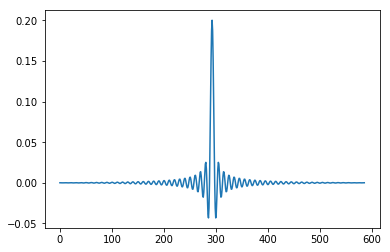

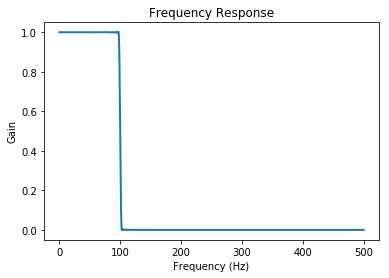

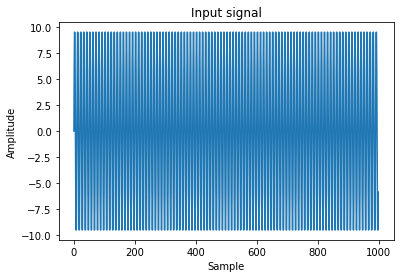

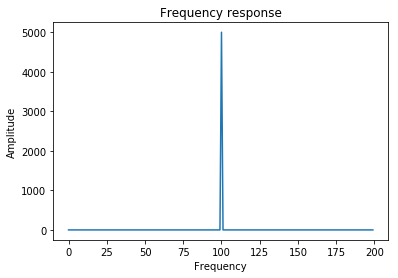

<function __main__.plot_all>

In [71]:
interact(plot_all, 
         a1=(1, max_amplitude, 1), f1=(1, max_frequency, 1), 
         a2=(1, max_amplitude, 1), f2=(1, max_frequency, 1),
         ripple_db=(1, 100, 1), cutoff_hz=(1, 200, 1))
